In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

## Loading images

In [2]:
img_ship = cv2.imread('/Users/mananmehta/Desktop/106042801-1564151441390cruiseshot.png.jpeg')
img_tree = cv2.imread('/Users/mananmehta/Desktop/wtml-1033462-alder-glen-finglas-niall-benvie.png')
img_car = cv2.imread("/Users/mananmehta/Desktop/598cc71515000084208b6139.jpg")

## Changing images to RGB

In [3]:
img_ship = img_ship[:,:,[2,1,0]]
img_tree = img_tree[:,:,[2,1,0]]
img_car = img_car[:,:,[2,1,0]]

## Resizing images 

In [4]:
img_ship = cv2.resize(img_ship,(300,200))
img_tree = cv2.resize(img_tree,(300,200))
img_car = cv2.resize(img_car,(300,200))

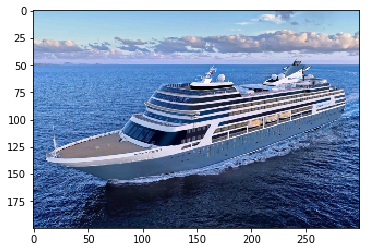

In [19]:
plt.imshow(img_ship)

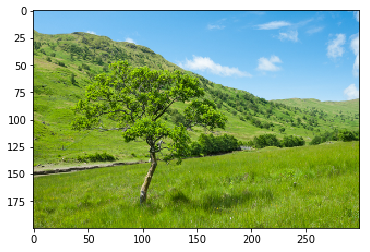

In [20]:
plt.imshow(img_tree)

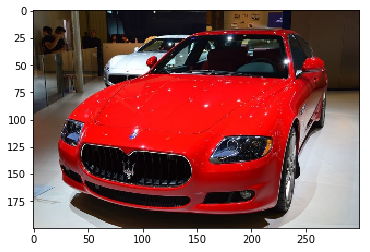

In [21]:
plt.imshow(img_car)

In [5]:
img_car.shape

(200, 300, 3)

## weight matrix is of the shape (1,80,000,3)
- Each column represents weights corresponding to one image

In [6]:
weights = np.random.randn(200*300*3,3)

In [7]:
y_train = np.array([[1,0,0],
             [0,1,0],
             [0,0,1]
             ])

## x_train is of the shape(3,1,80,000) 
- Each row defines one example

In [8]:
x_train = np.zeros((3,200*300*3))

In [9]:
x_train[0] = img_ship.flatten()
x_train[1] = img_tree.flatten()
x_train[2] = img_car.flatten()

In [10]:
x_train.shape

(3, 180000)

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [12]:
for e in range(1000):
    for i in range(3):
        y_hat = sigmoid(np.dot(x_train[i],weights))
        loss = y_hat - y_train[i]
        loss = np.reshape(loss,(1,3))
        test = np.reshape(x_train[i],(180000,1))
        grad = np.dot(test,loss)
        weights = weights - 0.01*grad

In [13]:
ship = weights[:,0]
tree = weights[:,1]
car = weights[:,2]

In [14]:
ship.shape

(180000,)

In [15]:
ship = ship.reshape((200,300,3))
tree = tree.reshape((200,300,3))
car = car.reshape((200,300,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


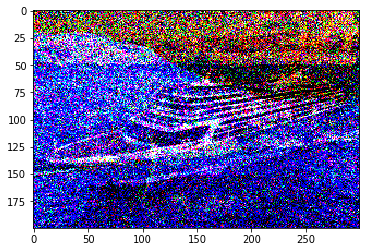

In [16]:
plt.imshow(ship)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


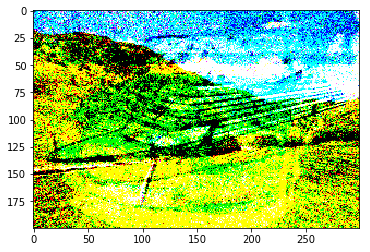

In [17]:
plt.imshow(tree)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


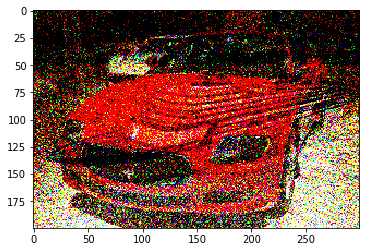

In [18]:
plt.imshow(car)